#Importing libraries

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split


#Loading Dataset

In [2]:
data= pd.read_csv("/content/Placement_Data_Full_Class.csv")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
data.shape

(215, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


**Here we found that our dataset has NaN values. We got that NaN values for no placements if we get it removed that in Status column will get only placements entries where we are building this model to predict how many employes got place or not, So we will drop Salary column instead.**

In [5]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
data.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [7]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


#EDA-Data Visualization

<Axes: xlabel='status', ylabel='count'>

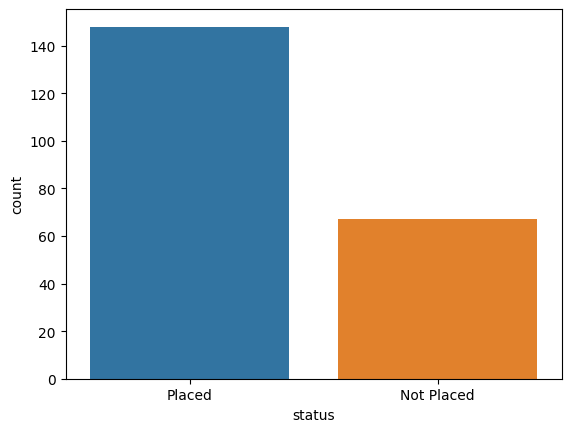

In [8]:
sns.countplot(x="status", data=data)

<Axes: xlabel='gender', ylabel='count'>

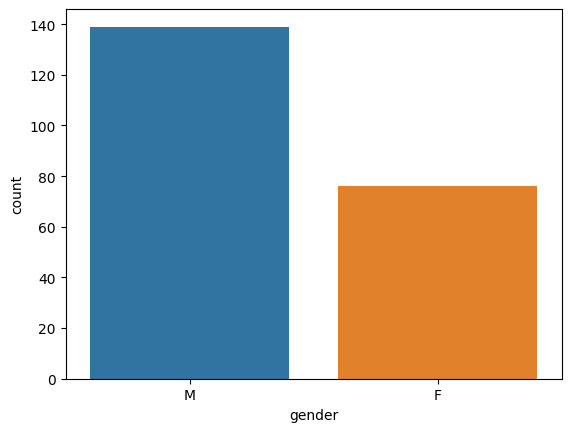

In [9]:
sns.countplot(x='gender',data=data)

In [10]:
corr=data.corr()

<ipython-input-10-c0bda979f113>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


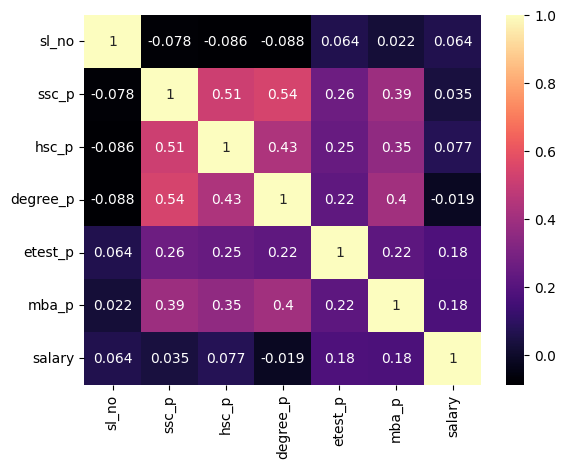

In [11]:
sns.heatmap(corr, cmap='magma',fmt=".2g", annot=True )
plt.show()

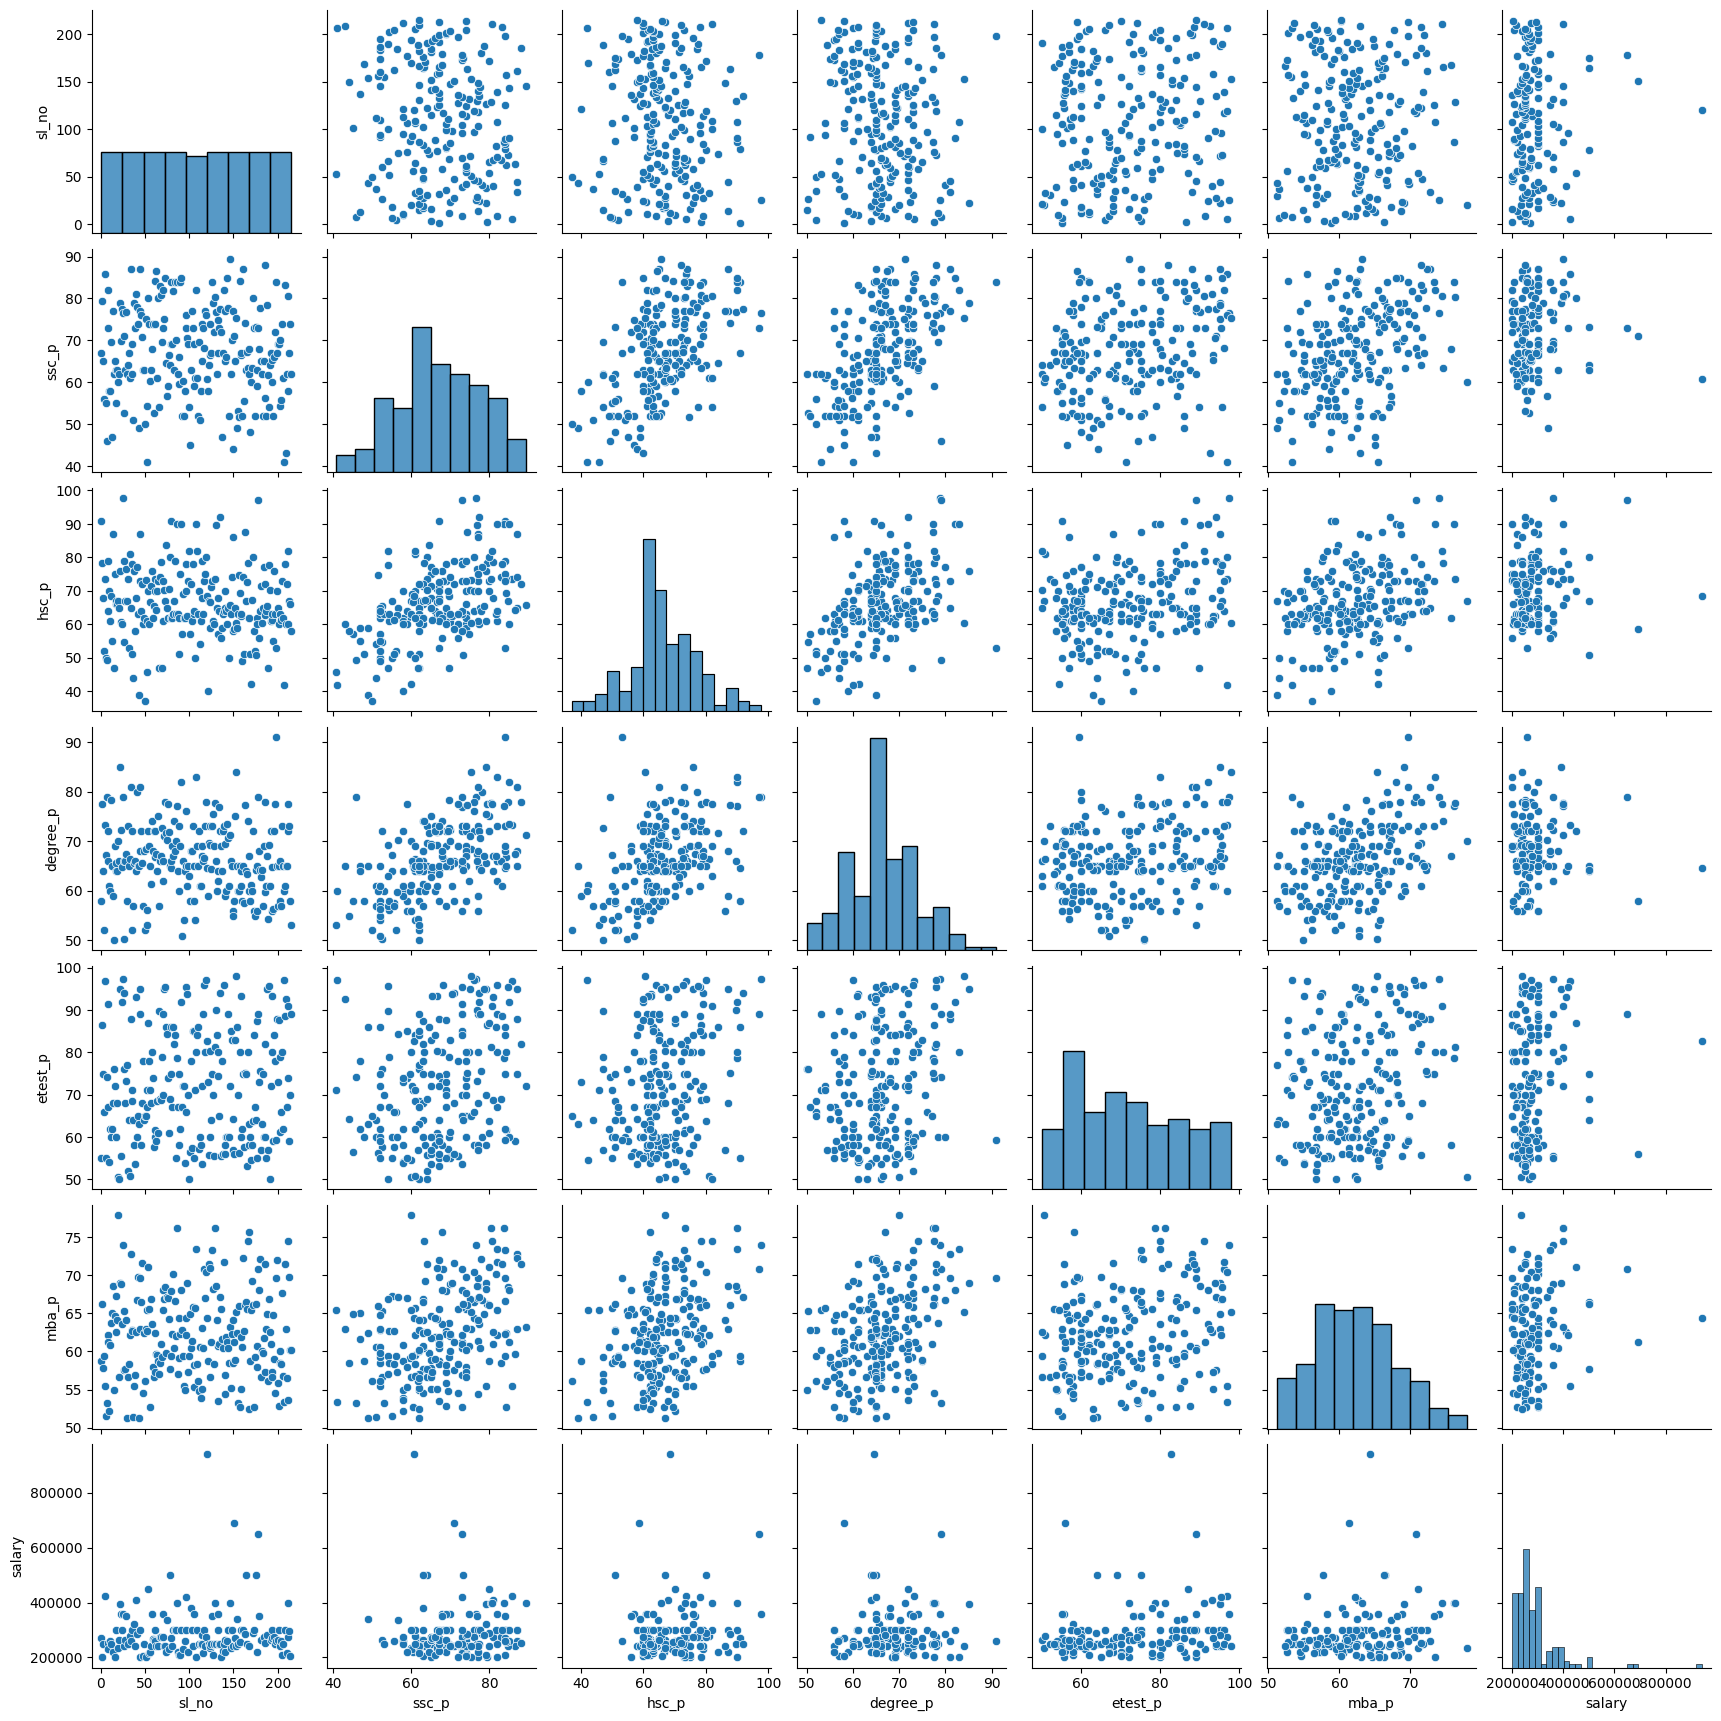

In [12]:
sns.pairplot(data)

In [13]:
data['workex']=data['workex'].astype('category')
data['workex']=data['workex'].cat.codes
data['status']=data['status'].astype('category')
data['status']=data['status'].cat.codes

In [14]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


In [15]:
df=data.drop(['sl_no',	'gender',	'ssc_b','hsc_b',	'hsc_s','degree_t',	'specialisation','salary'], axis =1)

In [16]:
df.head()

,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status
0,67.00,91.00,58.00,0,55.0,58.80,1
1,79.33,78.33,77.48,1,86.5,66.28,1
2,65.00,68.00,64.00,0,75.0,57.80,1
3,56.00,52.00,52.00,0,66.0,59.43,0
4,85.80,73.60,73.30,0,96.8,55.50,1


#Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scalar=StandardScaler()

In [19]:
scaled_features=scalar.fit_transform(df.drop('status',axis=1))

In [20]:
scaled_features

array([[-0.02808697,  2.2688123 , -1.14010225, -0.72444647, -1.29109087,
        -0.59764672],
       [ 1.11336869,  1.10344799,  1.51326671,  1.38036423,  1.08715679,
         0.6876202 ],
       [-0.21323793,  0.15331275, -0.32284282, -0.72444647,  0.21890765,
        -0.76947385],
       ...,
       [-0.02808697,  0.06133451,  0.90304633,  1.38036423, -0.98909117,
         1.27870553],
       [ 0.61994138, -0.03064373, -1.14010225, -0.72444647, -0.15859198,
        -0.35193393],
       [-0.49096436, -0.76646966, -1.82115177, -0.72444647,  1.27590661,
        -0.3536522 ]])

#Independent & Dependent Varaibles

In [21]:
X=scaled_features
y=df['status']

In [22]:
X

array([[-0.02808697,  2.2688123 , -1.14010225, -0.72444647, -1.29109087,
        -0.59764672],
       [ 1.11336869,  1.10344799,  1.51326671,  1.38036423,  1.08715679,
         0.6876202 ],
       [-0.21323793,  0.15331275, -0.32284282, -0.72444647,  0.21890765,
        -0.76947385],
       ...,
       [-0.02808697,  0.06133451,  0.90304633,  1.38036423, -0.98909117,
         1.27870553],
       [ 0.61994138, -0.03064373, -1.14010225, -0.72444647, -0.15859198,
        -0.35193393],
       [-0.49096436, -0.76646966, -1.82115177, -0.72444647,  1.27590661,
        -0.3536522 ]])

In [23]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int8

#Splitting dataset

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=32)

In [25]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (161, 6)
y_train (161,)
X_test (54, 6)
y_test (54,)


#Model Building-GaussianNB Algorithm

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [28]:
#Checking accuracy of training data
y_pred_train=model.predict(X_train)

In [29]:
from sklearn import metrics

In [30]:
metrics.accuracy_score(y_train,y_pred_train)*100

83.22981366459628

In [31]:
print(confusion_matrix(y_train,y_pred_train))

[[41 11]
 [16 93]]


In [32]:
#Checking accuracy of testing data
y_pred_test=model.predict(X_test)


In [33]:
metrics.accuracy_score(y_test,y_pred_test)*100

85.18518518518519

In [34]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.90      0.90      0.90        39

    accuracy                           0.85        54
   macro avg       0.82      0.82      0.82        54
weighted avg       0.85      0.85      0.85        54



In [35]:
print(confusion_matrix(y_test,y_pred_test))

[[11  4]
 [ 4 35]]


In [36]:
df1=pd.DataFrame({'Actual': y_test,'Predicted': y_pred_test})

In [37]:
df1

,Actual,Predicted
117,1,1
116,1,1
108,1,1
118,1,1
177,1,1
148,1,1
196,1,1
200,1,1
156,1,1
101,1,1


#Model Building-BernoulliNB Algorithm

In [38]:
from sklearn.naive_bayes import BernoulliNB

In [39]:
model1=BernoulliNB()
model1.fit(X_train,y_train)

BernoulliNB()

In [40]:
#Checking accuracy of testing data
y_pred_test1=model1.predict(X_test)


In [41]:
metrics.accuracy_score(y_test,y_pred_test1)*100

75.92592592592592

In [42]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.55      0.73      0.63        15
           1       0.88      0.77      0.82        39

    accuracy                           0.76        54
   macro avg       0.72      0.75      0.73        54
weighted avg       0.79      0.76      0.77        54



In [43]:
print(confusion_matrix(y_test,y_pred_test1))

[[11  4]
 [ 9 30]]
